In [284]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [285]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

## Görev 1 : Keşifçi Veri Analizi

#### Adım 1: Genel resmi inceleyiniz.

In [286]:
def load_diabetes():
    data = pd.read_csv("C:/Users/eyp_d/Desktop/VBO-Bootcamp-Dersler/6.Hafta/Ders Öncesi Notlar/datasets/diabetes.csv")
    return data

In [287]:
df = load_diabetes()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [288]:
df.shape

(768, 9)

In [289]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


##### Değişkenlerin maxiumum değerlerine karşılık gelen hastalar

In [290]:
for col in df.columns:  
    if col == "Outcome":
        pass
    else:
        print("\t\tMax_" + f"{col}")
        print("\t\t----------------------------\n")
        print(df[df[col] == df[col].max()])
        print("\n")

		Max_Pregnancies
		----------------------------

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
159           17      163             72             41      114 40.900                     0.817   47        1


		Max_Glucose
		----------------------------

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
661            1      199             76             43        0 42.900                     1.394   22        1


		Max_BloodPressure
		----------------------------

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
106            1       96            122              0        0 22.400                     0.207   27        0


		Max_SkinThickness
		----------------------------

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
579       

In [291]:
df.columns = [col.upper() for col in df.columns]
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


#### Adım 2: Numerik ve kategorik değişkenleri yakalayınız.

In [292]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    print(f"\ncat_cols: {cat_cols}")
    print(f"num_cols: {num_cols}")
    print(f"cat_but_car: {cat_but_car}")
    
    return cat_cols, num_cols, cat_but_car

In [293]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1

cat_cols: ['OUTCOME']
num_cols: ['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE']
cat_but_car: []


#### Adım 3: Numerik ve kategorik değişkenlerin analizini yapınız.

In [294]:
df[num_cols].describe().T   # Tüm değişkenler doğru şekilde sınıflandırılmış.

,count,mean,std,min,25%,50%,75%,max
PREGNANCIES,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
GLUCOSE,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BLOODPRESSURE,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SKINTHICKNESS,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
INSULIN,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DIABETESPEDIGREEFUNCTION,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
AGE,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000


In [295]:
df[cat_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
OUTCOME,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


#### Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)

In [296]:
df.groupby(cat_cols).agg({"OUTCOME": "mean"})

,OUTCOME
OUTCOME,
0,0
1,1


In [297]:
for col in num_cols: 
    print(df.groupby("OUTCOME").agg({col : "mean"}), "\n")

         PREGNANCIES
OUTCOME             
0              3.298
1              4.866 

         GLUCOSE
OUTCOME         
0        109.980
1        141.257 

         BLOODPRESSURE
OUTCOME               
0               68.184
1               70.825 

         SKINTHICKNESS
OUTCOME               
0               19.664
1               22.164 

         INSULIN
OUTCOME         
0         68.792
1        100.336 

           BMI
OUTCOME       
0       30.304
1       35.143 

         DIABETESPEDIGREEFUNCTION
OUTCOME                          
0                           0.430
1                           0.550 

           AGE
OUTCOME       
0       31.190
1       37.067 



#### Adım 5: Aykırı gözlem analizi yapınız.

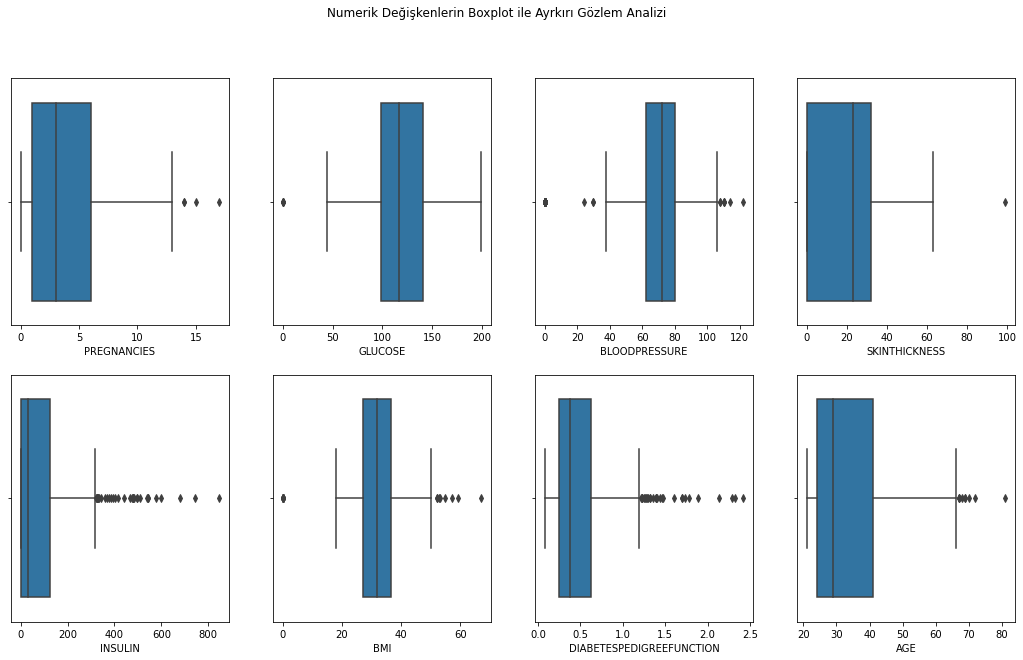

In [298]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Numerik Değişkenlerin Boxplot ile Ayrkırı Gözlem Analizi')

for i,col in enumerate(num_cols):
    if i < 4:
        sns.boxplot(x=df[col], ax=axes[0, i])
    else:
        sns.boxplot(x=df[col], ax=axes[1, (i-4)])
plt.show() 

Missing value'lar için veriye eklenen sıfır değerleri veri setinin outliers değişkenleri üzerinde etkisi olmuş gözüküyor. 

##### Veri seti değişkenleri özelinde aykırı değer var mı?

In [299]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [300]:
low, up = outlier_thresholds(df, "AGE")

In [301]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [302]:
check_outlier(df, "AGE")

True

In [303]:
for col in num_cols:     # Aykırı değerler bulunan değişkenler.
    print(col, check_outlier(df, col))

PREGNANCIES True
GLUCOSE True
BLOODPRESSURE True
SKINTHICKNESS True
INSULIN True
BMI True
DIABETESPEDIGREEFUNCTION True
AGE True


##### Aykırı değerleri olan değişkenlerin değerlerine ulaşmak

In [304]:
def find_all_outliers(dataframe, num_cols, head=3):
    for col in num_cols:
        if check_outlier(dataframe, col):
            low, up = outlier_thresholds(dataframe, col)
            print("\t\t\t" + f"{col}" + " Outliers")
            print("\t\t\t---------------------------------")
            print(dataframe[(dataframe[col] < low) | (dataframe[col] > up)].sort_values(col, ascending=False).head(head),"\n\n")

In [305]:
find_all_outliers(df, num_cols, 3)

			PREGNANCIES Outliers
			---------------------------------
     PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  DIABETESPEDIGREEFUNCTION  AGE  OUTCOME
159           17      163             72             41      114 40.900                     0.817   47        1
88            15      136             70             32      110 37.100                     0.153   43        1
298           14      100             78             25      184 36.600                     0.412   46        1 


			GLUCOSE Outliers
			---------------------------------
     PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  DIABETESPEDIGREEFUNCTION  AGE  OUTCOME
75             1        0             48             20        0 24.700                     0.140   22        0
182            1        0             74             20       23 27.700                     0.299   21        0
342            1        0             68             35        0 32.000                     0.3

#### Adım 6: Eksik gözlem analizi yapınız.

In [306]:
df.isnull().values.any()  # Veri seti üzerindeki eksik veriler 0 olarak doldurulduğundan, NaN olarak görülmemektedir.

False

In [307]:
df.notnull().sum() # Veri seti üzerinde eksik veri NaN olarak gösterilmediğinden, Görev-2'de eksik veri analizi yapılmıştır. 

PREGNANCIES                 768
GLUCOSE                     768
BLOODPRESSURE               768
SKINTHICKNESS               768
INSULIN                     768
BMI                         768
DIABETESPEDIGREEFUNCTION    768
AGE                         768
OUTCOME                     768
dtype: int64

#### Adım 7: Korelasyon analizi yapınız.

In [308]:
df_corr = df.corr(method ='pearson')  # Korelasyon tablosundan, ilgili değişkenlerin birbirleri arasındaki ilişki gücü görülebilir.

In [309]:
df_corr.sort_values("OUTCOME", ascending=False)  # Hedef değişkene(Outcome) göre 

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
OUTCOME,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000
GLUCOSE,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
AGE,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
PREGNANCIES,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
DIABETESPEDIGREEFUNCTION,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
INSULIN,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
SKINTHICKNESS,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
BLOODPRESSURE,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065


## Görev 2 : Feature Engineering

Buraya kadarki kısım, Veri setine ilk bakışla ilgiliydi. EDA olarak da tanımlanan buraya kadarki kısımda veri üzerinde herhangi bir değişiklik yapılmadı. 

Görev-2 ile birlikte veri seti, geliştirilecek model için sayısallaştırılacaktır. 

#### Adım 1: Eksik ve aykırı değerler için gerekli işlemleri yapınız.

Veri setinde eksik gözlem bulunmamakta ama Glikoz, Insulin vb.
değişkenlerde 0 değeri içeren gözlem birimleri eksik değeri ifade ediyor olabilir. Örneğin; bir kişinin glikoz veya insulin değeri 0
olamayacaktır. Bu durumu dikkate alarak sıfır değerlerini ilgili değerlerde NaN olarak atama yapıp sonrasında eksik
değerlere işlemleri uygulayabilirsiniz.

In [310]:
df.isnull().values.any()  # NaN değişken var mı?

False

In [311]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [312]:
df[df["INSULIN"] == 0].head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
5,5,116,74,0,0,25.600,0.201,30,0
7,10,115,0,0,0,35.300,0.134,29,0


In [313]:
nan_columns = [col for col in df.columns if (df[col] == 0).any(axis=None)]  
nan_columns

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'OUTCOME']

In [314]:
nan_columns = list(set(nan_columns) - set(["PREGNANCIES", "OUTCOME"]))  # Bu iki değişkenin sıfır olması eksik değer olması
nan_columns                                                             # amacıyla yapılmadığı varsayılmıştır.

['INSULIN', 'SKINTHICKNESS', 'BMI', 'BLOODPRESSURE', 'GLUCOSE']

Sıfır olarak tanımlanmış bu değişken değerleri missing value olarak değerlendirilip, NaN olarak değişti

In [315]:
for col in nan_columns:          # Sıfır değerlerine NaN atandı.
    df.loc[df[col] == 0, col] = np.nan

In [316]:
df.isnull().values.any()  # NaN değişken var mı?

True

In [317]:
df.isnull().sum().sort_values(ascending=False) # Değişkenlere göre NaN sayıları.

INSULIN                     374
SKINTHICKNESS               227
BLOODPRESSURE                35
BMI                          11
GLUCOSE                       5
PREGNANCIES                   0
DIABETESPEDIGREEFUNCTION      0
AGE                           0
OUTCOME                       0
dtype: int64

In [318]:
df.isnull().sum().sum()  # Veri setindeki toplam NaN sayısı.

652

In [319]:
df[df.isnull().any(axis=1)].head(8) # En az bir tane NaN değere sahip gözlem birimleri

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,1
5,5,116.000,74.000,NaN,NaN,25.600,0.201,30,0
7,10,115.000,NaN,NaN,NaN,35.300,0.134,29,0
9,8,125.000,96.000,NaN,NaN,NaN,0.232,54,1
10,4,110.000,92.000,NaN,NaN,37.600,0.191,30,0
11,10,168.000,74.000,NaN,NaN,38.000,0.537,34,1


In [320]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [321]:
missing_values_table(df)   # Değişkenlere ait NaN sayılarının, toplam veri setine göre oranları.

               n_miss  ratio
INSULIN           374 48.700
SKINTHICKNESS     227 29.560
BLOODPRESSURE      35  4.560
BMI                11  1.430
GLUCOSE             5  0.650


missing value değeri küçük olan GLUCOSE ve BMI değişkeni, değişkenlerin mean'nine göre doldurulacaktır. Diğer değişkenler bir sonraki adımda doldurulacaktır.

In [322]:
df["GLUCOSE"] = df["GLUCOSE"].fillna(df["GLUCOSE"].mean())

In [323]:
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())

In [324]:
missing_values_table(df)

               n_miss  ratio
INSULIN           374 48.700
SKINTHICKNESS     227 29.560
BLOODPRESSURE      35  4.560


#### Adım 2: Yeni değişkenler oluşturunuz.

Yaş aralıklarına göre sınıflandırma

##### Kategorize edilmiş AGE değişkeni

In [325]:
df.loc[(df['AGE'] <= 22), 'AGE_CAT'] = 'young'
df.loc[(df['AGE'] > 22) & (df['AGE'] <= 35), 'AGE_CAT']  = "adult"
df.loc[(df['AGE'] > 35) & (df['AGE'] <= 55), 'AGE_CAT'] = 'mature'
df.loc[(df['AGE'] > 55), 'AGE_CAT'] = 'senior'

In [326]:
df_corr.sort_values("INSULIN", ascending=False) # En fazla NaN değerine sahip INSULIN değişkeninin,
                                                # diğer değişkenlerle olan korelasyon değerleri.

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
INSULIN,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
SKINTHICKNESS,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
GLUCOSE,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DIABETESPEDIGREEFUNCTION,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
OUTCOME,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000
BLOODPRESSURE,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
AGE,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
PREGNANCIES,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222


Görüldüğü üzere, INSULIN ile korelasyon değeri en yüksek değişken SKINTHICKNESS. Fakat, SKINTHICKNESS değişkeni en çok NaN değerleri olan ikinci değişken olduğundan, GLUCOSE değişkenini kategorize edip NaN INSULIN değerlerini buna göre vereceğiz.

In [327]:
df["GLUCOSE"].describe().T

count   768.000
mean    121.687
std      30.436
min      44.000
25%      99.750
50%     117.000
75%     140.250
max     199.000
Name: GLUCOSE, dtype: float64

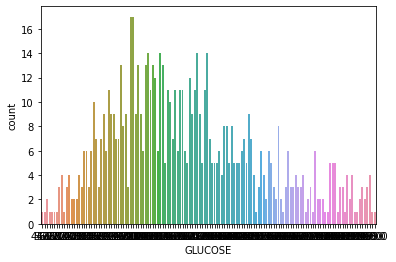

In [328]:
sns.countplot(x=df["GLUCOSE"])
plt.show()

##### Kategorize edilmiş GLUCOSE değişkeni

In [329]:
df["GLUCOSE_LEVEL"] = pd.qcut(df["GLUCOSE"], q=[0, 0.25, 0.5, 0.75, 1], labels=['very_poor', 'low', 'normal', 'high'], )
df.head(8)

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,AGE_CAT,GLUCOSE_LEVEL
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,1,mature,high
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,0,adult,very_poor
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,1,adult,high
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,very_poor
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,adult,normal
5,5,116.000,74.000,NaN,NaN,25.600,0.201,30,0,adult,low
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26,1,adult,very_poor
7,10,115.000,NaN,NaN,NaN,35.300,0.134,29,0,adult,low


##### GLUCOSE_LEVEL ---> INSULIN NaN değişkenleri belirlenir

In [330]:
df["INSULIN"] = df["INSULIN"].fillna(df.groupby("GLUCOSE_LEVEL")["INSULIN"].transform("median"))

In [331]:
missing_values_table(df)

               n_miss  ratio
SKINTHICKNESS     227 29.560
BLOODPRESSURE      35  4.560


INSULIN değişkeninden sonra en fazla missing value bulunduran değişken SKINTHICKNESS. Bu değişkenle aralarında korelasyonu en yüksek olan değişken BMI'dır (INSULIN dışında). 

In [332]:
df_corr.sort_values("SKINTHICKNESS", ascending=False)

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
SKINTHICKNESS,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
INSULIN,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
BLOODPRESSURE,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
DIABETESPEDIGREEFUNCTION,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
OUTCOME,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000
GLUCOSE,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
PREGNANCIES,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
AGE,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238


In [333]:
df["BMI"].describe().T

count   768.000
mean     32.457
std       6.875
min      18.200
25%      27.500
50%      32.400
75%      36.600
max      67.100
Name: BMI, dtype: float64

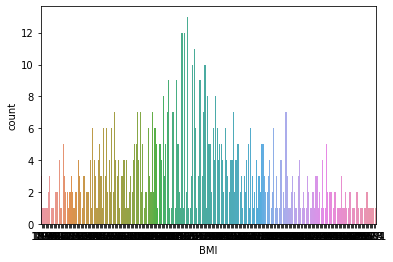

In [334]:
sns.countplot(x=df["BMI"])
plt.show()

##### Kategorize edilmiş BMI_LEVEL değişkeni

In [335]:
df["BMI_LEVEL"] = pd.qcut(df["BMI"], q=[0, 0.15, 0.4, 0.8, 1], labels=["normal weight", "overweight", "obesity", "super obesity"])
df.head(8)

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,AGE_CAT,GLUCOSE_LEVEL,BMI_LEVEL
0,6,148.000,72.000,35.000,194.000,33.600,0.627,50,1,mature,high,obesity
1,1,85.000,66.000,29.000,66.000,26.600,0.351,31,0,adult,very_poor,overweight
2,8,183.000,64.000,NaN,194.000,23.300,0.672,32,1,adult,high,normal weight
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,very_poor,overweight
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,adult,normal,super obesity
5,5,116.000,74.000,NaN,110.000,25.600,0.201,30,0,adult,low,overweight
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26,1,adult,very_poor,obesity
7,10,115.000,NaN,NaN,110.000,35.300,0.134,29,0,adult,low,obesity


##### BMI_LEVEL ---> SKINTHICKNESS NaN değişkenleri belirlenir

In [336]:
df["SKINTHICKNESS"] = df["SKINTHICKNESS"].fillna(df.groupby("BMI_LEVEL")["SKINTHICKNESS"].transform("median"))

In [337]:
missing_values_table(df)

               n_miss  ratio
BLOODPRESSURE      35  4.560


BLOODPRESSURE'daki eksik değerlerin doldurulması için aralarındaki korelasyonu yüksek olan BMI değişkeni kullanılacaktır.

##### BMI_LEVEL ---> BLOODPRESSURE NaN değişkenleri belirlenir

In [338]:
df["BLOODPRESSURE"] = df["BLOODPRESSURE"].fillna(df.groupby("BMI_LEVEL")["BLOODPRESSURE"].transform("median"))

In [339]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


Hedef değişkenle anlamlı korelasyonu olabilecek BLOODPRESSURE değişkeni kategorize edilecektir.

In [340]:
df["BLOODPRESSURE"].describe()

count   768.000
mean     72.366
std      12.126
min      24.000
25%      64.000
50%      72.000
75%      80.000
max     122.000
Name: BLOODPRESSURE, dtype: float64

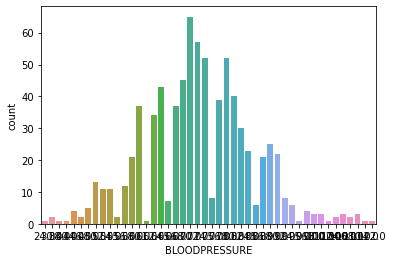

In [341]:
sns.countplot(x=df["BLOODPRESSURE"])
plt.show()

##### Kategorize edilmiş BLOODPRESSURE_LEVEL değişkeni

In [342]:
df["BLOODPRESSURE_LEVEL"] = pd.qcut(df["BLOODPRESSURE"], q=[0, 0.75, 0.85, 0.9, 1], labels=["optimal","normal", "pre-hypertension", "hyperttension"])
df.head(8)

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,AGE_CAT,GLUCOSE_LEVEL,BMI_LEVEL,BLOODPRESSURE_LEVEL
0,6,148.000,72.000,35.000,194.000,33.600,0.627,50,1,mature,high,obesity,optimal
1,1,85.000,66.000,29.000,66.000,26.600,0.351,31,0,adult,very_poor,overweight,optimal
2,8,183.000,64.000,18.000,194.000,23.300,0.672,32,1,adult,high,normal weight,optimal
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young,very_poor,overweight,optimal
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,adult,normal,super obesity,optimal
5,5,116.000,74.000,23.000,110.000,25.600,0.201,30,0,adult,low,overweight,optimal
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26,1,adult,very_poor,obesity,optimal
7,10,115.000,72.000,30.000,110.000,35.300,0.134,29,0,adult,low,obesity,optimal


In [343]:
df.shape  # Başlangıçta 9 olan değişken sayısı 13'e yükseltildi.

(768, 13)

In [344]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 13
cat_cols: 5
num_cols: 8
cat_but_car: 0
num_but_cat: 4

cat_cols: ['AGE_CAT', 'OUTCOME', 'GLUCOSE_LEVEL', 'BMI_LEVEL', 'BLOODPRESSURE_LEVEL']
num_cols: ['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE']
cat_but_car: []


In [345]:
for col in num_cols:   # Yeni eklenen değişkenler sonrası değiken bazında aykırı değerler.
    print(col, check_outlier(df, col))

PREGNANCIES True
GLUCOSE False
BLOODPRESSURE True
SKINTHICKNESS True
INSULIN True
BMI True
DIABETESPEDIGREEFUNCTION True
AGE True


In [346]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

Yapılan değişiklikler sonrası aykırı değerler kontrolü

In [347]:
for col in num_cols:      # Aykırı değerler eşik değerlerle değiştirildi.
    replace_with_thresholds(df, col)

In [348]:
for col in num_cols:   # Eşik değer değişimi sonrası aykırı değerler durumu
    print(col, check_outlier(df, col))

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS False
INSULIN False
BMI False
DIABETESPEDIGREEFUNCTION False
AGE False


In [349]:
missing_values_table(df)   # Yeni eklenen değişkenler sonrası değiken bazında missing value'lar.

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


#### Adım 3: Encoding işlemlerini gerçekleştiriniz.

##### Label Encoder

In [350]:
[col for col in df.columns if df[col].dtype not in ["int64", "float64"]  # Label Encoder yapmak için herhangi bir değişken yok.
               and df[col].nunique() == 2]

[]

##### Rare Encoder

In [351]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [352]:
rare_analyser(df, "OUTCOME", cat_cols)

AGE_CAT : 4
        COUNT  RATIO  TARGET_MEAN
adult     363  0.473        0.317
mature    220  0.286        0.545
senior     50  0.065        0.340
young     135  0.176        0.119


OUTCOME : 2
   COUNT  RATIO  TARGET_MEAN
0    500  0.651            0
1    268  0.349            1


GLUCOSE_LEVEL : 4
           COUNT  RATIO  TARGET_MEAN
very_poor    192  0.250        0.073
low          194  0.253        0.247
normal       190  0.247        0.389
high         192  0.250        0.688


BMI_LEVEL : 4
               COUNT  RATIO  TARGET_MEAN
normal weight    121  0.158        0.066
overweight       189  0.246        0.270
obesity          306  0.398        0.428
super obesity    152  0.198        0.513


BLOODPRESSURE_LEVEL : 4
                  COUNT  RATIO  TARGET_MEAN
optimal             603  0.785        0.317
normal               53  0.069        0.472
pre-hypertension     52  0.068        0.442
hyperttension        60  0.078        0.483




Yeni türetilmiş değişkenlerin, veri setindeki dağılımları iyi. Bu sebeple, rare encoding yapılmayacaktır.

##### One Hot Encoding

In [353]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]  # One-Hot encoding için uygun değişkenler
ohe_cols

['AGE_CAT', 'GLUCOSE_LEVEL', 'BMI_LEVEL', 'BLOODPRESSURE_LEVEL']

In [354]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [355]:
df = one_hot_encoder(df, ohe_cols)

In [356]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,AGE_CAT_mature,AGE_CAT_senior,AGE_CAT_young,GLUCOSE_LEVEL_low,GLUCOSE_LEVEL_normal,GLUCOSE_LEVEL_high,BMI_LEVEL_overweight,BMI_LEVEL_obesity,BMI_LEVEL_super obesity,BLOODPRESSURE_LEVEL_normal,BLOODPRESSURE_LEVEL_pre-hypertension,BLOODPRESSURE_LEVEL_hyperttension
0,6.000,148.000,72.000,35.000,194.000,33.600,0.627,50.000,1,1,0,0,0,0,1,0,1,0,0,0,0
1,1.000,85.000,66.000,29.000,66.000,26.600,0.351,31.000,0,0,0,0,0,0,0,1,0,0,0,0,0
2,8.000,183.000,64.000,18.000,194.000,23.300,0.672,32.000,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,0,0,0,0,1,0,0,0,1,0,0,0


In [357]:
df.shape

(768, 21)

In [358]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 21
cat_cols: 13
num_cols: 8
cat_but_car: 0
num_but_cat: 13

cat_cols: ['OUTCOME', 'AGE_CAT_mature', 'AGE_CAT_senior', 'AGE_CAT_young', 'GLUCOSE_LEVEL_low', 'GLUCOSE_LEVEL_normal', 'GLUCOSE_LEVEL_high', 'BMI_LEVEL_overweight', 'BMI_LEVEL_obesity', 'BMI_LEVEL_super obesity', 'BLOODPRESSURE_LEVEL_normal', 'BLOODPRESSURE_LEVEL_pre-hypertension', 'BLOODPRESSURE_LEVEL_hyperttension']
num_cols: ['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE']
cat_but_car: []


In [359]:
rare_analyser(df, "OUTCOME", cat_cols)

OUTCOME : 2
   COUNT  RATIO  TARGET_MEAN
0    500  0.651            0
1    268  0.349            1


AGE_CAT_mature : 2
   COUNT  RATIO  TARGET_MEAN
0    548  0.714        0.270
1    220  0.286        0.545


AGE_CAT_senior : 2
   COUNT  RATIO  TARGET_MEAN
0    718  0.935        0.350
1     50  0.065        0.340


AGE_CAT_young : 2
   COUNT  RATIO  TARGET_MEAN
0    633  0.824        0.398
1    135  0.176        0.119


GLUCOSE_LEVEL_low : 2
   COUNT  RATIO  TARGET_MEAN
0    574  0.747        0.383
1    194  0.253        0.247


GLUCOSE_LEVEL_normal : 2
   COUNT  RATIO  TARGET_MEAN
0    578  0.753        0.336
1    190  0.247        0.389


GLUCOSE_LEVEL_high : 2
   COUNT  RATIO  TARGET_MEAN
0    576  0.750        0.236
1    192  0.250        0.688


BMI_LEVEL_overweight : 2
   COUNT  RATIO  TARGET_MEAN
0    579  0.754        0.375
1    189  0.246        0.270


BMI_LEVEL_obesity : 2
   COUNT  RATIO  TARGET_MEAN
0    462  0.602        0.297
1    306  0.398        0.428


BMI_LEVEL_supe

#### Adım 4: Numerik değişkenler için standartlaştırma yapınız. 

In [360]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE']

In [361]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [362]:
df[num_cols].head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE
0,0.647,0.865,-0.029,0.701,0.795,0.181,0.589,1.446
1,-0.849,-1.206,-0.541,0.053,-1.007,-0.870,-0.378,-0.189
2,1.246,2.016,-0.711,-1.134,0.795,-1.365,0.747,-0.103
3,-0.849,-1.075,-0.541,-0.595,-0.613,-0.645,-1.023,-1.050
4,-1.148,0.503,-2.759,0.701,0.429,1.607,2.597,-0.017


In [363]:
df.head()  # Genel Bakış

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,AGE_CAT_mature,AGE_CAT_senior,AGE_CAT_young,GLUCOSE_LEVEL_low,GLUCOSE_LEVEL_normal,GLUCOSE_LEVEL_high,BMI_LEVEL_overweight,BMI_LEVEL_obesity,BMI_LEVEL_super obesity,BLOODPRESSURE_LEVEL_normal,BLOODPRESSURE_LEVEL_pre-hypertension,BLOODPRESSURE_LEVEL_hyperttension
0,0.647,0.865,-0.029,0.701,0.795,0.181,0.589,1.446,1,1,0,0,0,0,1,0,1,0,0,0,0
1,-0.849,-1.206,-0.541,0.053,-1.007,-0.870,-0.378,-0.189,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1.246,2.016,-0.711,-1.134,0.795,-1.365,0.747,-0.103,1,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.849,-1.075,-0.541,-0.595,-0.613,-0.645,-1.023,-1.050,0,0,0,1,0,0,0,1,0,0,0,0,0
4,-1.148,0.503,-2.759,0.701,0.429,1.607,2.597,-0.017,1,0,0,0,0,1,0,0,0,1,0,0,0


In [364]:
df.shape

(768, 21)

#### Adım 5: Model oluşturunuz.

In [365]:
y = df["OUTCOME"]
X = df.drop(["OUTCOME"], axis=1)

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [367]:
from sklearn.ensemble import RandomForestClassifier

In [368]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [369]:
accuracy_score(y_pred, y_test)  # Modelin accuracy değeri

0.7987012987012987

##### Modele göre veri setindeki değişkenlerin diyabet hastalığına sebep olma derecelerini grafiksel olarak gösterirsek

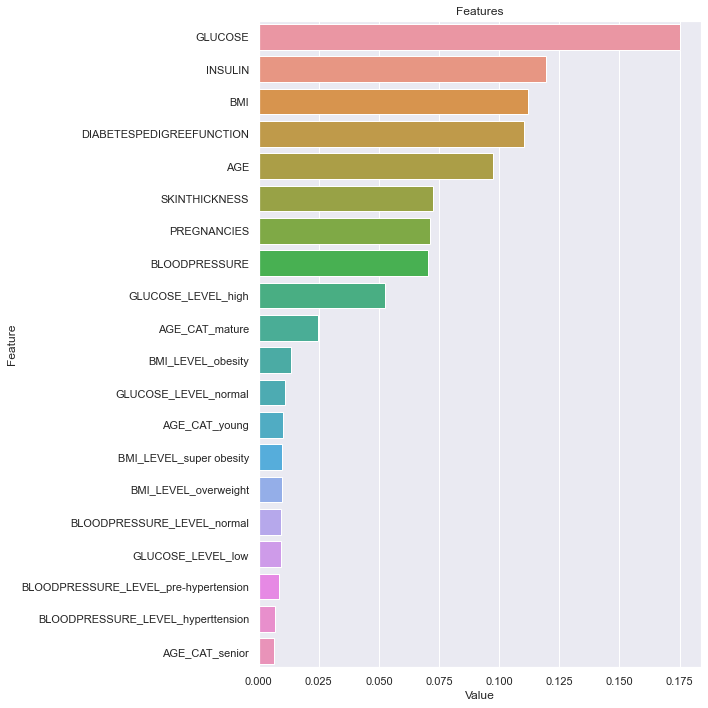

In [370]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X_train)